# Mini Proyecto 1 - Modelacion y Simulacion
María Fernanda López - 17160
Ana Lucía Hernandez - 17138

In [1]:
from random import choice
from numpy import array
from random import randint 
import random
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import math

## Triangulo de Sierspinski

In [4]:
#Encuentra el punto medio 
def puntoMedio(x, y):
    xf = (x[0]+y[0])/2
    yf =  (x[1]+y[1])/2
    return xf,yf

def createTriangle(iters):
    f1 = (0.,0.)
    f2 = (1.,0.)
    f3 = (0.5, 1.0)

    V = [f1, f2, f3]
    p0 = (0.5, 0.)
    T = [p0]

    for i in range(iters):
        idx = choice([0,1,2])
        vact = V[idx]
        pact = T[-1]
        psig = puntoMedio(pact,vact)
        T.append(psig)

    T = array(T)
    plt.scatter(T[:,0], T[:,1], s=0.1)
    plt.show()

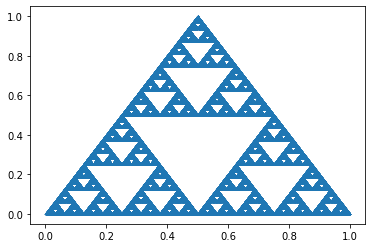

In [5]:
createTriangle(1000000)

## Helecho de Barnsley

In [12]:
def createBarnsley(iters):
    # inicializar lista de coeficientes xn, yn
    x = [] 
    y = [] 

    # set primer elemento a 0
    x.append(0) 
    y.append(0) 

    nth_it = 0
    N = iters

    for i in range(1, N): 

        # generar numero random entre 1 y 100
        z = randint(1, 100) 

        # para la probabilidad de 0.01
        if z == 1: 
            x.append(0) 
            y.append(0.16*(y[nth_it])) 

        # para la probabilidad de 0.85  
        if z>= 2 and z<= 86: 
            x.append(0.85*(x[nth_it]) + 0.04*(y[nth_it])) 
            y.append(-0.04*(x[nth_it]) + 0.85*(y[nth_it])+1.6) 

        # para la probabilidad de 0.07a
        if z>= 87 and z<= 93: 
            x.append(-0.15*(x[nth_it]) + 0.28*(y[nth_it])) 
            y.append(0.26*(x[nth_it]) + 0.24*(y[nth_it])+0.44) 

        # para la probabilidad de 0.07b 
        if z>= 94 and z<= 100: 
            x.append(0.2*(x[nth_it]) - 0.26*(y[nth_it])) 
            y.append(0.23*(x[nth_it]) + 0.22*(y[nth_it])+1.6) 

        nth_it += 1

    plt.scatter(x, y, s = 0.2, edgecolor ='green') 

    plt.show() 

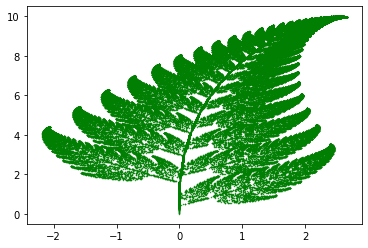

In [13]:
createBarnsley(100000)

## Analisis de Pseudorandoms

In [2]:
# uso de función proveida en clase para pseudorandoms
def pseudorandom(a, m):
    def inner_pseudo(xo, n):
        items = list(range(n))
        items[0] = xo

        for i in range(1, n):
            items[i] = (a * items[i - 1]) % m
        return [i / float(m) for i in items]
    return inner_pseudo

generador1 = (pow(5,5), pow(2,35) - 1)
generador2 = (pow(7,5), pow(2,31) - 1)

pseudorandom_1 = pseudorandom(*generador1)
pseudorandom_2 = pseudorandom(*generador2)

def randomNormal(iters):
    randoms = []
    for i in range(iters):
        randoms.append(random.random())
    return randoms
    
def histograma(frequency, saltos, iters):
    for salto, cont in zip(saltos[1:], frequency):
        print(round(salto - 0.1, 1), '-' ,round(salto, 1), ' '.join(np.repeat('*', int(cont * 100/iters))), '(' + str(cont) + ',', str(cont * 100/iters) + '% )')
            

   

#### 100 iteraciones

In [40]:
iters = 100
randoms = pseudorandom_1(20, iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Generador 1')
histograma(frequency, saltos, iters)

Generador 1
0.0 - 0.1 * * * * * * * * * * * * * * * * (16, 16.0% )
0.1 - 0.2 * * * * * * * * * * (10, 10.0% )
0.2 - 0.3 * * * * * * * * (8, 8.0% )
0.3 - 0.4 * * * * * * * * * * * * * (13, 13.0% )
0.4 - 0.5 * * * * * * * * (8, 8.0% )
0.5 - 0.6 * * * * * * * (7, 7.0% )
0.6 - 0.7 * * * * * * * * * * * * (12, 12.0% )
0.7 - 0.8 * * * * (4, 4.0% )
0.8 - 0.9 * * * * * * * * * * * * (12, 12.0% )
0.9 - 1.0 * * * * * * * * * * (10, 10.0% )


In [41]:
randoms = pseudorandom_2(20, iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Generador 2')
histograma(frequency, saltos, iters)

Generador 2
0.0 - 0.1 * * * * * * * * * * * * (12, 12.0% )
0.1 - 0.2 * * * * * * * (7, 7.0% )
0.2 - 0.3 * * * * * * * * * (9, 9.0% )
0.3 - 0.4 * * * * * * * * * * * * * * (14, 14.0% )
0.4 - 0.5 * * * * * * * (7, 7.0% )
0.5 - 0.6 * * * * * * * * * * * * (12, 12.0% )
0.6 - 0.7 * * * * * * * * * * * * * * (14, 14.0% )
0.7 - 0.8 * * * * * * * * * * (10, 10.0% )
0.8 - 0.9 * * * * * * * (7, 7.0% )
0.9 - 1.0 * * * * * * * * (8, 8.0% )


In [44]:
randoms = randomNormal(iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Random Normal')
histograma(frequency, saltos, iters)


Random Normal
0.0 - 0.1 * * * * * * * * * (9, 9.0% )
0.1 - 0.2 * * * * * * * (7, 7.0% )
0.2 - 0.3 * * * * * * * * * * * * * (13, 13.0% )
0.3 - 0.4 * * * * * * * * (8, 8.0% )
0.4 - 0.5 * * * * * * * * * * * * (12, 12.0% )
0.5 - 0.6 * * * * * * * (7, 7.0% )
0.6 - 0.7 * * * * * * * * * * * (11, 11.0% )
0.7 - 0.8 * * * * * * * * * * * * * * * (15, 15.0% )
0.8 - 0.9 * * * * * * * * * * * * (12, 12.0% )
0.9 - 1.0 * * * * * * (6, 6.0% )


#### 5000 iteraciones

In [49]:
iters = 5000
randoms = pseudorandom_1(20, iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Generador 1')
histograma(frequency, saltos, iters)

Generador 1
0.0 - 0.1 * * * * * * * * * (492, 9.84% )
0.1 - 0.2 * * * * * * * * * (483, 9.66% )
0.2 - 0.3 * * * * * * * * * (493, 9.86% )
0.3 - 0.4 * * * * * * * * * (499, 9.98% )
0.4 - 0.5 * * * * * * * * * (466, 9.32% )
0.5 - 0.6 * * * * * * * * * * (516, 10.32% )
0.6 - 0.7 * * * * * * * * * * (544, 10.88% )
0.7 - 0.8 * * * * * * * * * (496, 9.92% )
0.8 - 0.9 * * * * * * * * * * (518, 10.36% )
0.9 - 1.0 * * * * * * * * * (493, 9.86% )


In [50]:
randoms = pseudorandom_2(20, iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Generador 2')
histograma(frequency, saltos, iters)

Generador 2
0.0 - 0.1 * * * * * * * * * * (501, 10.02% )
0.1 - 0.2 * * * * * * * * * (488, 9.76% )
0.2 - 0.3 * * * * * * * * * (494, 9.88% )
0.3 - 0.4 * * * * * * * * * * (508, 10.16% )
0.4 - 0.5 * * * * * * * * * (497, 9.94% )
0.5 - 0.6 * * * * * * * * * * (503, 10.06% )
0.6 - 0.7 * * * * * * * * * * (528, 10.56% )
0.7 - 0.8 * * * * * * * * * (486, 9.72% )
0.8 - 0.9 * * * * * * * * * * (506, 10.12% )
0.9 - 1.0 * * * * * * * * * (489, 9.78% )


In [51]:
randoms = randomNormal(iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Random Normal')
histograma(frequency, saltos, iters)

Random Normal
0.0 - 0.1 * * * * * * * * * (469, 9.38% )
0.1 - 0.2 * * * * * * * * * * (539, 10.78% )
0.2 - 0.3 * * * * * * * * * * (528, 10.56% )
0.3 - 0.4 * * * * * * * * * * (527, 10.54% )
0.4 - 0.5 * * * * * * * * * (492, 9.84% )
0.5 - 0.6 * * * * * * * * * * (504, 10.08% )
0.6 - 0.7 * * * * * * * * * * (505, 10.1% )
0.7 - 0.8 * * * * * * * * * (480, 9.6% )
0.8 - 0.9 * * * * * * * * (429, 8.58% )
0.9 - 1.0 * * * * * * * * * * (527, 10.54% )


#### 100000 iteraciones

In [52]:
iters = 100000
randoms = pseudorandom_1(20, iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Generador 1')
histograma(frequency, saltos, iters)

Generador 1
0.0 - 0.1 * * * * * * * * * * (10140, 10.14% )
0.1 - 0.2 * * * * * * * * * * (10273, 10.273% )
0.2 - 0.3 * * * * * * * * * (9849, 9.849% )
0.3 - 0.4 * * * * * * * * * (9860, 9.86% )
0.4 - 0.5 * * * * * * * * * (9704, 9.704% )
0.5 - 0.6 * * * * * * * * * * (10409, 10.409% )
0.6 - 0.7 * * * * * * * * * (9970, 9.97% )
0.7 - 0.8 * * * * * * * * * (9967, 9.967% )
0.8 - 0.9 * * * * * * * * * * (10093, 10.093% )
0.9 - 1.0 * * * * * * * * * (9735, 9.735% )


In [53]:
randoms = pseudorandom_2(20, iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Generador 2')
histograma(frequency, saltos, iters)

Generador 2
0.0 - 0.1 * * * * * * * * * (9829, 9.829% )
0.1 - 0.2 * * * * * * * * * (9964, 9.964% )
0.2 - 0.3 * * * * * * * * * (9925, 9.925% )
0.3 - 0.4 * * * * * * * * * (9957, 9.957% )
0.4 - 0.5 * * * * * * * * * (9930, 9.93% )
0.5 - 0.6 * * * * * * * * * * (10025, 10.025% )
0.6 - 0.7 * * * * * * * * * * (10085, 10.085% )
0.7 - 0.8 * * * * * * * * * * (10104, 10.104% )
0.8 - 0.9 * * * * * * * * * (9962, 9.962% )
0.9 - 1.0 * * * * * * * * * * (10219, 10.219% )


In [54]:
randoms = randomNormal(iters)
frequency, saltos = np.histogram(randoms, bins=10, range=[0,1])

print('Random Normal')
histograma(frequency, saltos, iters)

Random Normal
0.0 - 0.1 * * * * * * * * * * (10111, 10.111% )
0.1 - 0.2 * * * * * * * * * * (10082, 10.082% )
0.2 - 0.3 * * * * * * * * * * (10003, 10.003% )
0.3 - 0.4 * * * * * * * * * (9870, 9.87% )
0.4 - 0.5 * * * * * * * * * (9998, 9.998% )
0.5 - 0.6 * * * * * * * * * (9844, 9.844% )
0.6 - 0.7 * * * * * * * * * (9936, 9.936% )
0.7 - 0.8 * * * * * * * * * (9967, 9.967% )
0.8 - 0.9 * * * * * * * * * * (10068, 10.068% )
0.9 - 1.0 * * * * * * * * * * (10121, 10.121% )


### Discusion del mejor algoritmo

A medida que aumentan las iteraciones los generadores se van comportando similar y obteniendo la misma cantidad de numeros randoms por cada salto que generamos. 
Al revisar la iteración intermedia, la cual es de 5000, podemos observar que aquí si se nota una diferencia signifativa donde el segundo generador distribuye más uniformemente, esto lo podemos notar dado a que el porcentaje para la mayoría es aproximadamente 10%. Por lo que el mejor generador es el que cuenta con la siguiente ecuación 

$$ x_{n} = 7^5 x_{n - 1} [mod(2^{31} - 1)] $$

## Integral unidimensional

$$ \theta=\int_{-\infty}^{\infty}e^{-x^{2}}dx  = \int_{0}^{1} \frac{2e^{-(\frac{1}{x} - 1)^{2}}}{x^{2}} dx $$ 

Para realizar la conversión de integral impropia - con límites $\infty$ y $-\infty$ - a una propia - con límites definidos, como 0 y 1 - se comenzó por la premisa que, si una función es simétrica (en otras palabras, si es par) en un intervalo que está centrado en 0, se puede adaptar para que sea impropia únicamente en uno de los límites:
$$\int_{-\infty}^{\infty}f(x)dx = 2\int_{0}^{\infty}f(x)dx $$

La función original es par, ya que se observa que $f(x) = f(-x)$. A partir de esto, también se tiene la conversión a una integral completamente propia:

$$\theta=\int_{-\infty}^{\infty}f(x)dx  = \int_{0}^{\infty} g(x)dx $$ 
$$ h(y) = \frac{g(\frac{1}{y} - 1)}{y^{2}} $$ 
$$\theta=\int_{0}^{1}h(y)dy$$ 

Con estas consideraciones, se obtiene la integral en límites de 0 a 1.

In [3]:
#metodo de monteCarlo utilizado para la aproximacion del resultado de la
#integral
# se obtiene promedio de todos la función evaluada en todos los valores 
#random para la ejecución 
def monteCarlo(iters):
    results = []
    randoms = pseudorandom_2(20, iters)
    for x in randoms:
        results.append(integral(x))
    
    return sum(results) / len(results)


In [9]:
# definición de función convertida para integral de 0 a 1
integral = lambda x: 2*(math.exp(-((1.0/x) - 1.0)**2.0) / x**2.0)

In [6]:
print("Resultado para 100 iteraciones:", str(monteCarlo(100)))
print("Resultado para 10K iteraciones:", str(monteCarlo(10000)))
print("Resultado para 1M iteraciones:", str(monteCarlo(1000000)))

Resultado para 100 iteraciones: 1.8203347683537539
Resultado para 10K iteraciones: 1.7705054958561872
Resultado para 1M iteraciones: 1.772888192745789


## Integral bidimensional

$$ \theta=\int_{0}^{\infty}\int_{0}^{x}e^{-(x+y)}dy dx = \int_{0}^{\infty} (e^{-x} - e^{-2x}) dx = \int_{0}^{1} \frac{e^{-(\frac{1}{x} - 1)} - e^{-2(\frac{1}{x} - 1)}}{x^{2}} dx $$ 


In [7]:
integral = lambda x: ( ( (math.e**(-((1/x) - 1))) - (math.e**(-2*((1/x) - 1))) ) / (x**2) )

In [8]:
print("MonteCarlo:")
print("100: " + str(monteCarlo(100)))       
print("10,000: " + str(monteCarlo(10000)))    
print("1,000,000: " + str(monteCarlo(1000000)))   

MonteCarlo:
100: 0.5273012438489123
10,000: 0.5046415996214115
1,000,000: 0.49991082753746574
